# 1. Importation des Librairies

In [151]:
# 1. Importation des Librairies
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des donnees

In [152]:
# 2. Chargement des donnees
data = pd.read_csv('Data/studentscores.csv')

In [153]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [154]:
# 3. Analyse des donnees
data.isnull().sum() # Verification de valeurs manquantes

Hours     0
Scores    0
dtype: int64

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [156]:
data['Hours'].max()

np.float64(9.2)

In [157]:
data['Hours'].min()

np.float64(1.1)

In [158]:
print(data['Hours'].max())

9.2


In [159]:
print("Max Score: ",data['Scores'].max())

Max Score:  95


In [160]:
print("Min Score: ",data['Scores'].min())

Min Score:  17


# 4. Division des donnees

In [161]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


### Variables Indep et Varibale Dep

In [162]:
X = data.iloc[ : , :-1].values
y = data.iloc[ : , -1].values

In [163]:
#X

In [164]:
#y

## 4.1 Separation de donnees : Train et Test

In [165]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=40)

In [167]:
print("X-train Shape:", X_train.shape)
print("X-test Shape:", X_test.shape)
print("y-train Shape:", y_train.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (18, 1)
X-test Shape: (7, 1)
y-train Shape: (18,)
y-test Shape: (7,)


# 5. Construire le Modele 

In [168]:
# Importer l'algorithme de la Regression Linear
from sklearn.linear_model import LinearRegression

In [169]:
modele_lineaire = LinearRegression()

In [170]:
# Entrainement du modele
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [171]:
# Faire de prediction
y_scores_predits = modele_lineaire.predict(X_test)

In [172]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [173]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [174]:
resultats = pd.DataFrame(y_test, y_scores_predits)

In [175]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [176]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [177]:
print("MSE de la Regression Lineaire:", mean_squared_error(
    y_test, y_scores_predits))

MSE de la Regression Lineaire: 51.90159659147337


In [178]:
print("R2 Score de la Regression Lineaire :", r2_score(
    y_test, y_scores_predits))

R2 Score de la Regression Lineaire : 0.9168569951293908


# 6. Visualisation de Resultats

In [179]:
import matplotlib.pyplot as plt

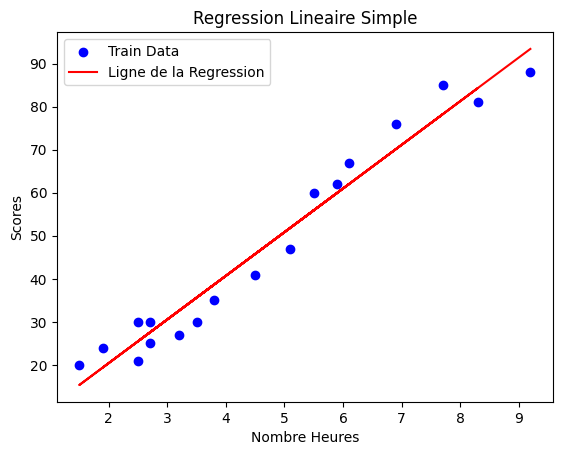

In [182]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scores')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

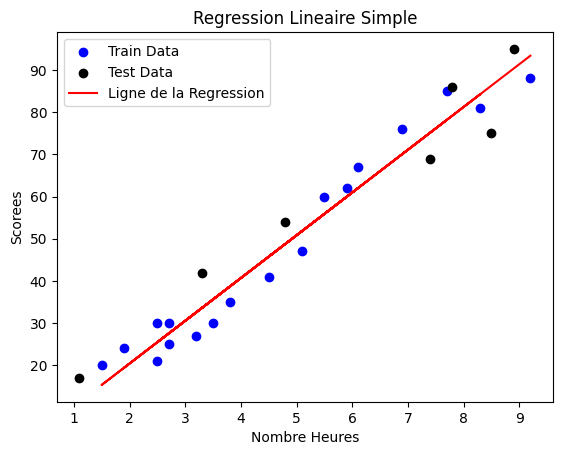

In [185]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scorees')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

# 7. Prediction simple

In [193]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [190]:
resultats = pd.DataFrame({'y-score-reel': y_test, 'y-scores-predits':y_scores_predits})
resultats

,y-score-reel,y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [191]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [194]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [199]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [200]:
resultats

,y-score-reel,y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [209]:
 # y =  b0 + b1*x1
# Score = b0 + b1 * Hours
b1 = modele_lineaire.coef_
print("b1 = ",modele_lineaire.coef_)

b1 =  [10.13396571]


In [210]:
b0 = modele_lineaire.intercept_
print("b0 = ", modele_lineaire.intercept_)

b0 =  0.1563257200808863


In [219]:
print(modele_lineaire.predict([[3]]))

[30.55822286]


In [220]:
Score = b0 + b1 * 3
print(Score)

[30.55822286]
